In [ ]:
#basic lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Sub-stage 1.2: Import Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:

# Sub-stage 1.3: Import Machine Learning Libraries
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
#2.1 load data set
dataset=pd.read_csv('/content/so2_20180101_20231031 (1).csv')
dataset

,TimeStamp,3207010,33204020,29209010,33202110,14104030,8344010,43202020,34202020,28209010,...,23211040,12201160,11222020,15201150,27201030,20202050,5203020,34207090,27210010,44214010
0,2018-01-01 00:00:00,0.000,0.005,0.003,0.003,0.002,0.000,0.000,0.001,0.001,...,0.0,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
1,2018-01-01 01:00:00,0.000,0.005,0.003,0.003,0.002,0.000,0.000,0.001,0.001,...,0.0,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
2,2018-01-01 02:00:00,0.000,0.005,0.003,0.003,0.005,0.000,0.000,0.001,0.001,...,0.0,0.000,0.000,0.001,0.004,0.003,0.000,0.001,0.0,0.003
3,2018-01-01 03:00:00,0.000,0.007,0.002,0.004,0.005,0.000,0.000,0.001,0.001,...,0.0,0.000,0.000,0.001,0.004,0.003,0.001,0.001,0.0,0.003
4,2018-01-01 04:00:00,0.000,0.004,0.002,0.003,0.004,0.000,0.001,0.001,0.001,...,0.0,0.000,0.000,0.000,0.004,0.003,0.001,0.001,0.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,2019-03-28 17:00:00,0.001,0.015,0.002,0.004,0.003,0.001,0.002,0.003,0.001,...,0.0,0.001,0.002,0.001,0.004,0.003,0.001,0.005,0.0,0.002
10842,2019-03-28 18:00:00,0.001,0.011,0.002,0.004,0.004,0.001,0.002,0.002,0.001,...,0.0,0.001,0.002,0.001,0.004,0.003,0.001,0.004,0.0,0.002
10843,2019-03-28 19:00:00,0.000,0.008,0.002,0.004,0.003,0.001,0.001,0.002,0.001,...,0.0,0.000,0.004,0.001,0.003,0.003,0.001,0.008,0.0,0.002
10844,2019-03-28 20:00:00,0.000,0.004,0.002,0.004,0.004,0.001,0.001,0.002,0.001,...,0.0,0.000,0.003,0.001,0.004,0.004,0.001,0.013,0.0,0.002


In [ ]:
#2.2 Handle missing data
dataset.replace(['None','',np.nan],inplace=True)

In [ ]:
#3.1 Selected column
selected_column='33204020'

In [ ]:
#3.2 split training and testing
train_data,test_data=train_test_split(dataset[selected_column],test_size=0.2,shuffle=False)


In [ ]:
#create dataset function
def create_dataset(dataset,time_steps=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_steps-1):
    a=dataset[i:(i+time_steps)]
    dataX.append(a)
    dataY.append(dataset[i+time_steps])
  return np.array(dataX,dtype=float),np.array(dataY,dtype=float)

In [ ]:
time_steps=10
X_train,y_train=create_dataset(train_data.values.squeeze(),time_steps)
X_test,y_test=create_dataset(test_data.values.squeeze(),time_steps)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Correct the variable name to X_train
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_steps,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=2)
predictions=model.predict(X_test)

Epoch 1/10
116/116 - 4s - loss: 1.6041e-05 - 4s/epoch - 33ms/step
Epoch 2/10
116/116 - 1s - loss: 1.1434e-05 - 991ms/epoch - 9ms/step
Epoch 3/10
116/116 - 1s - loss: 1.0614e-05 - 1s/epoch - 9ms/step
Epoch 4/10
116/116 - 1s - loss: 9.7274e-06 - 969ms/epoch - 8ms/step
Epoch 5/10
116/116 - 1s - loss: 9.6159e-06 - 961ms/epoch - 8ms/step
Epoch 6/10
116/116 - 1s - loss: 8.5843e-06 - 1s/epoch - 9ms/step
Epoch 7/10
116/116 - 1s - loss: 8.3711e-06 - 1s/epoch - 12ms/step
Epoch 8/10
116/116 - 1s - loss: 7.6759e-06 - 1s/epoch - 10ms/step
Epoch 9/10
116/116 - 1s - loss: 8.4166e-06 - 809ms/epoch - 7ms/step
Epoch 10/10
116/116 - 1s - loss: 7.3530e-06 - 980ms/epoch - 8ms/step
29/29 [==============================] - 1s 3ms/step


RMSE: 0.001843450755080967


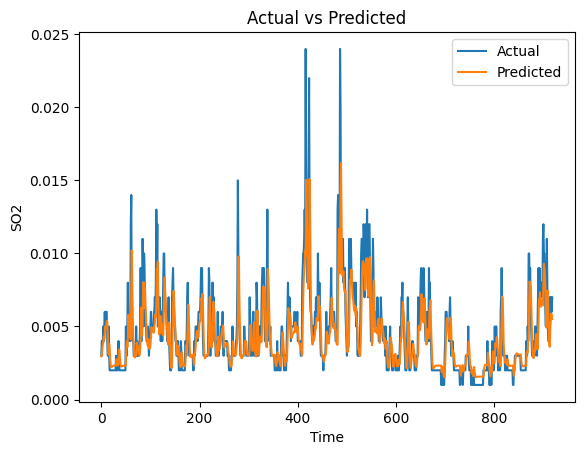

In [ ]:
if np.isnan(y_test).any() or np.isnan(predictions).any():
  print("Error: input data contains NaN values.")
else:
  mse=mean_squared_error(y_test,predictions)
  rmse=sqrt(mse)
  print("RMSE:",rmse)
  plt.plot(y_test,label='Actual')
  plt.plot(predictions,label='Predicted')
  plt.legend()
  plt.title('Actual vs Predicted')
  plt.xlabel('Time')
  plt.ylabel('SO2')
  plt.show()